In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import select_features
#archivo = '..\data\ISBSG - Release May 2017 R1.csv'
archivo = '..\data\ISBSG DATA Release 12.csv'
df = pd.read_csv(archivo, sep = ';', low_memory = False)
#variables = ['Data Quality Rating', 'UFP rating', 'Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Count Approach', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Summary Work Effort', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Resource Level', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count', 'Agile Method Used']
variables = ['Data Quality Rating', 'UFP rating', 'Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Count Approach', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Summary Work Effort', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Resource Level', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count']
df = df.loc[:, variables]
filtro = ((df['Data Quality Rating'] == 'A') | (df['Data Quality Rating'] == 'B')) & ((df['UFP rating'] == 'A') | (df['UFP rating'] == 'B')) 
df = df.loc[filtro, :]
filtro = (df['Normalised Work Effort Level 1'].notnull()) & (df['Normalised Work Effort Level 1'] == df['Summary Work Effort'])
df = df.loc[filtro, :]
filtro = df['Count Approach'] == 'IFPUG 4+'
df = df.loc[filtro, :]
#variables = ['Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count', 'Agile Method Used']
variables = ['Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count']
df = df.loc[:, variables]
df = df.dropna(axis=1, thresh=int(0.5*len(df)))
df = df.dropna()
print(len(df))
df['Project Elapsed Time'] = df['Project Elapsed Time'].str.replace(',', '.').astype(float)
programmingLenguaje = {'A:G':'Unspecified', 'ASP.Net':'ASP', 'BASIC':'Visual Basic', 'CSP':'Unspecified', 'Visual C':'C'}
df['Primary Programming Language'].replace( programmingLenguaje, inplace = True)
database = {'[;].*':';','ACCESS[; ].*':'ACCESS', 'MS Access':'ACCESS', 'ACCESS;':'ACCESS', 'ADABAS;':'ADABAS', 'Micosoft.*':'Attain', 'DB2[; /].*':'DB2', 'IBM DB2':'DB2', 'UDB2':'DB2', 'Domino[ ].*':'Domino', 'LOTUS.*':'Domino', 'Notes.*':'Domino', 'Exchange.*':'Exchange', 'FOXPRO;':'Foxpro', 'HIRDB;':'HIRDB', 'DB[/].*':'IMS', 'DEDB;':'IMS', 'IDMS[; -].*':'IMS', 'IMS.*':'IMS', 'MS[- ]SQL[; ].*':'MS SQL', 'MSDE.*':'MS SQL', 'SQL Server[; ].*':'MS SQL', 'SQL;':'MS SQL', 'VSE/.*':'MS SQL', 'NCR;':'NCR', 'Oracle.*':'ORACLE', 'Personal O.*':'ORACLE', 'RDB[; ].*':'ORACLE', 'CICS;':'ORACLE', 'SAS;':'SAS', 'Solid;':'Solid', 'SYBASE.*':'SYBASE', 'YES':'Unspecified', 'ISAM;':'Unspecified', 'multiple;':'Unspecified', 'VSAM[; ].*':'Unspecified', 'WATCOM[; ].*':'Watcom', 'WGRES;':'WGRES'}
df['1st Data Base System'].replace( database, inplace = True, regex = True)
df['1st Data Base System'].replace( {'ACCESS;':'ACCESS'}, inplace = True, regex = True)

Using TensorFlow backend.
621


In [2]:
#df = select_features.recode_dataframe(df)
mmre = select_features.calcular_mmre('Normalised Work Effort Level 1', select_features.recode_dataframe(df))
mmre

1.6485429768778834

In [4]:
#df = select_features.recodeDataframe(df)
mmre = select_features.calcular_mmre_v2('Normalised Work Effort Level 1', select_features.recode_dataframe(df))
mmre

with 0 missing, elapsed time: 0.066
Imputing row 501/621 with 0 missing, elapsed time: 0.067
Imputing row 601/621 with 0 missing, elapsed time: 0.067
Imputing row 1/621 with 0 missing, elapsed time: 0.066
Imputing row 101/621 with 0 missing, elapsed time: 0.066
Imputing row 201/621 with 0 missing, elapsed time: 0.067
Imputing row 301/621 with 0 missing, elapsed time: 0.068
Imputing row 401/621 with 0 missing, elapsed time: 0.068
Imputing row 501/621 with 0 missing, elapsed time: 0.069
Imputing row 601/621 with 0 missing, elapsed time: 0.069
Imputing row 1/621 with 0 missing, elapsed time: 0.066
Imputing row 101/621 with 0 missing, elapsed time: 0.067
Imputing row 201/621 with 0 missing, elapsed time: 0.067
Imputing row 301/621 with 0 missing, elapsed time: 0.068
Imputing row 401/621 with 0 missing, elapsed time: 0.068
Imputing row 501/621 with 0 missing, elapsed time: 0.069
Imputing row 601/621 with 0 missing, elapsed time: 0.069
Imputing row 1/621 with 0 missing, elapsed time: 0.069
I

1.695678842163315

In [2]:
df = select_features.recode_dataframe_R(df)
mi1 = select_features.calcular_mi_R_2v('Project_Elapsed_Time', 'Functional_Size', df)
mi2 = select_features.calcular_mi_R_2v('Functional_Size', 'Project_Elapsed_Time' ,df)
print(mi1)
print(mi2)

0.04862906310513759
0.10121279243896986


attr_importance
Functional_Size                      0.230217
Adjusted_Function_Points             0.228966
Project_Elapsed_Time                 0.171562
Primary_Programming_Language         0.170776
First_Data_Base_System               0.110734
Industry_Sector                      0.088594
Development_Platform                 0.029404
Application_Group                    0.024950
Development_Type                     0.012348
Language_Type                        0.011684
Used_Methodology                     0.004538


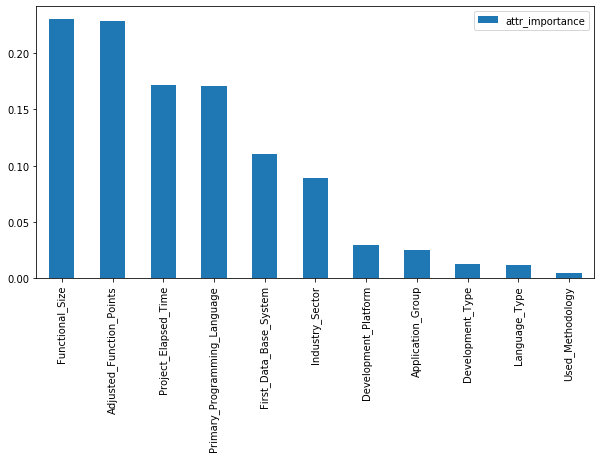

In [3]:
df = select_features.recode_dataframe_R(df)
mi = select_features.calcular_mi_R('Normalised_Work_Effort_Level_1', df)
print(mi)
mi.plot.bar(figsize=(10, 5))

In [2]:
df = select_features.recode_dataframe_R(df)
mrmr = select_features.calcular_mrmr_R('Normalised_Work_Effort_Level_1', df)
print(mrmr)

AttributeError: module 'select_features' has no attribute 'recodeDataframe_R'

In [ ]:
mrmr.plot.bar(figsize=(10, 6))

In [ ]:
test = select_features.calcularMi_Manual('Development Platform', df)
print(test)
testing = select_features.calc_MI_scikit(df['Adjusted Function Points'], df['1st Data Base System'])
print(testing)

In [ ]:
mRMR = select_features.calcular_mRMRV2('Normalised Work Effort Level 1', df)
#mRMR.sort_values(ascending=False).plot.bar(figsize=(10, 5))
mRMR.plot.bar(figsize=(10, 5))
mRMR

In [ ]:
#Utilizando el método normalize_mutual_info_score
mi = select_features.calcularMi_Manual('Normalised Work Effort Level 1', df)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
print(mi)

In [ ]:
df.dtypes

In [ ]:
#variables = ['Industry Sector', 'Application Group', 'Development Type', 'Platform Development', 'Language Type', 'Primary Programming Language', '1st Data Base System', 'Used Methodology']
variables = ['1st Data Base System']
dcount = df.loc[:, variables]
for c in dcount.columns:
    print("---- %s ---" % c)
    print(dcount[c].value_counts())
    print('')